# Quantitative Macroeconomics - Homework II
Ivana Kaloyanova Ganeva

*October 10, 2020*

In [72]:
# SOME PRELIMINARIES:
# (loading the necessary libraries)
import pandas as pd
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
np.seterr(divide = 'ignore', invalid = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Qustion 1. A Representative Agent Economy
Within this question, we are asked to consider the closed optimal growth economy populated by a large number of identical infinitely-lived households which maximize:
$$\mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\}$$
over consumption and leisure, $u(c_t)=\log(c_t)$, subject to the constraints of:
\begin{align*}
c_t + i_t &= y_t\\
y_t &= k_t^{1-\theta}(zh_t)^{\theta}\\
i_t &= k_{t+1} - (1-\delta)k_t \, .
\end{align*}
As required, I will set labour share at $\theta=0.67$, and will start with the value of $h_t=0.31$ for all $t$; the population growth is here considered to be $0$.

### a) The Steady-State
For this part of the exercise, we are originally asked to compute the steady-state; and to choose $z$ to match an annual capital-output ratio of $4$, and an investment-output ratio of $0.25$. However, for the latter, it will become clear that $z$ cancels out when we derive the explicit expressions of the ratios, and hence the steady-state in these scenarios will be independent of our choice on the productivity parameter $z$. Therefore, I will simply proceed to derive the steady-state corresponding to the ratios given, without 'controlling' for $z$.

#### Analytical Solution
It is clear that we can reduce the number of constraints by substituting the second and third binding constraints into the first one. That is, we can re-write the optimization problem of the representative household as:
\begin{align*}
&\max_{c_t, k_{t+1}} \mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\}\\
&\text{s.t.} \quad c_t + k_{t+1} - (1-\delta)k_t = k_t^{1-\theta}(zh_t)^{\theta}, \quad \forall t \, .
\end{align*}

This formulation allows us to construct the Lagrangean function as follows:
$$
\mathcal{L}(c_t, k_{t+1}; \mu_t) = \mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t)\right\} - \sum_{t=0}^{\infty}\mu_t\left(c_t + k_{t+1} - (1-\delta)k_t - k_t^{1-\theta}(zh_t)^{\theta}\right) \, .
$$

The respective First-Order Conditions read as:
\begin{align*}
[c_t]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial c_t} = 0 &\Leftrightarrow \beta^t u_c(c_t) - \mu_t = 0 \, ;\\
[k_{t+1}]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial k_{t+1}} = 0 &\Leftrightarrow -\mu_t + \mu_{t+1}\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right) = 0 \, .
\end{align*}

From this, one can proceed as usual to combine the respective F.O.C.s for $c_t$ and $c_{t+1}$ together with the expression above for $k_{t+1}$ to obtain the inter-temporal Euler equation for consumption. That is, we have that:
\begin{align*}
\dfrac{u_c(c_t)}{u_c(c_{t+1})} &= \beta\dfrac{\mu_{t}}{\mu_{t+1}}\\
\Longleftrightarrow \dfrac{u_c(c_t)}{u_c(c_{t+1})} &= \beta\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right) \, ,
\end{align*}

which after the substitution with $u_c(c) = \dfrac{1}{c}$ (by the log-utility given) becomes:
$$
c_{t+1} = \beta\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right)c_t \, .
$$

Once the steady-state is imposed on $c$ and $k$, we have that $c_{t+1}=c_t\equiv c_{ss}$ and this translates to 
$$
(1-\delta) + (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta} = \beta^{-1} \quad \text{at the st.s.}
$$

That is, for $k_{ss}$ it will hold that 
$$
k_{t+1}=k_t\equiv k_{ss} = \left(\dfrac{1-\theta}{1-\delta-\dfrac{1}{\beta}}\right)^{\dfrac{1}{\theta}}\cdot zh_t \, .
$$

This allows us to obtain the precise values for our variables/parameters that lead to the desired ratios of capital to output and of investment to output, once we normalize output to one. That is, once we set $y_{ss}$ to 1, we must obviously have $k_{ss}=4$ and $i_{ss} = 0.25$. Hence, once we substitute into the original constraints, i.e. into the law of motion of capital, the budget constraint, etc., we arrive at:

\begin{align*}
c_{ss} = y_{ss} - i_{ss} &\Longleftrightarrow \boldsymbol{c_{ss}} = 1-0.25 = 0.75 \,;\\
k_{ss}\delta^* = i_{ss} &\Longleftrightarrow \boldsymbol{\delta^*} = 0.25\cdot 0.25 = 0.0625\,;\\
z^* = \left(\frac{y_{ss}}{k_{ss}^{1-\theta}h_t^{\theta}}\right)^{\frac{1}{\theta}} &\Longleftrightarrow \boldsymbol{z^*} = \left(\frac{1}{4^{1-0.67}0.31^{0.67}}\right)^{\frac{1}{0.67}} = 1.629676 \,.
\end{align*}

where in the last of the calculations we substitute with the values for $\theta$ and $h_t$ given.

Within the next part of this question, I will proceed to check these calculations via an R code.

#### Computational Derivations
Below, I will provide the computational derivation of the steady state for the representative household model described above.

In [44]:
# STEP 1:
# Creating a function that calculates the Steady State values:
#   inputs: (the known parameters of)
#           - h_t (labour supply)
#           - theta (labour share)
#           - z (productivity)
#           (the desired ratios of)
#           - k_to_y (capital-output ratio)
#           - i_to_y (investment-output ratio)
#           & most importantly, the vector x containing all the s.s. variables
# [Based on the non-linear equations for constraints that we have in this model.]

# Defining the known parameters/ratios outside the function:
# (fsolve wouldn't work otherwise - if that was possible, I would instead type
# st_state_function <- function(x, h = 0.31, theta = 0.67, z, k_to_y = 4, i_to_y = 0.25)
# ...
#)

h = 0.31; theta = 0.67; k_to_y = 4; i_to_y = 0.25;
z = 1.629 # as suggested

def st_state_function(x):
  # The Five Constraints:
  #   (which will be equated to zero when obtaining the roots/solution)
  # - The Capital-Output Ratio:
  k_to_y_constr = k_to_y - (x[1]/x[2])
  # - The Investment-Output Ratio:
  i_to_y_constr = i_to_y - ((x[3]*x[1])/x[2])
  # - The Euler Equation:
  ee_constr = (1 - x[3] + (1-theta)*((z*h)**theta)*(x[1])**(-theta))*x[4]-1
  # - The Budget/Resource Constraint:
  b_constr = x[2] - x[0] - x[1]*x[3]
  # - Cobb-Douglas Production:
  cd_prod_constr = x[2] - (x[1]**(1-theta))*((z*h)**(theta))
  # For the five variables of: c_ss, k_ss, y_ss, delta, and beta
  # - these are five and not six since we can isolate i_ss as i_ss = k_ss*delta
  #   in the budget constraint
  # - also considering z to be a parameter rather than a variable
  #   [following the arguments in the analytical part - it cancels out]
  # - having put these variables into a vector x to match the syntax of the fsolve funct:
  # x = (c_ss, k_ss, y_ss, delta, beta)
  #     x[0]   x[1]  x[2]  x[3]   x[4]
  return [k_to_y_constr, i_to_y_constr, ee_constr, b_constr, cd_prod_constr]

# STEP 2: 
# Setting the initial guess:
x_0 = [0.7, 3.9, 1, 0.06, 0.95]
  # using the normalization y = 1 at the initial guess

# STEP 3: 
# Solving the function, i.e. finding the steady state numerically:
x_ss = fsolve(st_state_function, x_0)
print(x_ss)

# These are the steady state values for consumption, capital, output, delta and beta, respectively:

[0.74968885 3.99834054 0.99958513 0.0625     0.98039216]


In [45]:
# Calculating the investment in steady state using the relationship established analytically above:
i_ss = x_ss[3]*x_ss[1] # i.e. investment_ss = delta* . capital_ss
print(i_ss)

0.24989628364490718


### b) New Steady-State, $z'=2z$
For this part, one simply needs to change the initial value for $z$ and re-run the function defined above. That is presented in the following chunk.

In [46]:
z = 2*z # doubling the productivity parameter as required

x_ss_2 = fsolve(st_state_function, x_0)
i_ss_2 = x_ss_2[3]*x_ss_2[1]

print({'x_ss_2': x_ss_2, 'i_ss_2': i_ss_2})
# Once again, these are the values for consumption, capital, output, delta and beta, as well as for investment, resp.

{'x_ss_2': array([1.4993777 , 7.99668108, 1.99917027, 0.0625    , 0.98039216]), 'i_ss_2': 0.4997925672221337}


It is noticeable that the steady state values here have doubled for the case where we double the productivity parameter. Now, I will proceed to explore the transition paths from the first steady state to the second one, as required.

### c) The Transition
Here, we will explore the transition dynamics of the variables of interest when following the path from the first steady state with $z=1.629$ to the other, where the productivity parameter doubles.

In [47]:
# Setting the number of periods/iterations here:
n = 100

# For simplicity, let us define the Cobb-Douglas production function in the beginning:
def cd_prod(k,z):
    return (k**(1-theta))*((z*h)**theta)
    # theta and h will be fixed, as given; 
    # the variables here will be capital and z - since we are interested in the changes of capital following
                                            # the switch in the productivity parameter of z

# Now, using the combined constraint in the final formulation of the optimization problem of the RA,
# one can establish the Euler Equation as a function of the capital over two consecutive periods only.
# [Hence, we will need three Euler Equations in total to obtain all the values on the paths.]

# That is, we can first solve for the capital sequence, based on the Euler equation and our initial constraints.
k_ss = x_ss[1]
k_ss_2 = x_ss_2[1]
    # These are respectively the first and last values for capital - i.e. the end points for the two steady states.

beta = x_ss[4]
delta = x_ss[3]
    
def path_function(k):
    # Setting the first and last elements to match the two steady states:
    k[0] = k_ss
    k[n-1] = k_ss_2
    # Initializing the empty vector for the capital transitions:
    k_path = np.zeros(n)
    # Obtaining the middle elements:
    for i in range(0, n-2):
        if i == 0:
            k_path[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[i+2] - \
            beta*(cd_prod(k[0], z) + (1-delta)*k[0] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[0], z))/(k[0]**(1-theta))))
            # bearing in mind that z now coincides with z', i.e. that it is doubled already
        elif i == (n-2):
            k_path[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[n-1] - \
            beta*(cd_prod(k[i], z) + (1-delta)*k[i] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[i], z))/(k[i]**(1-theta))))
        else:
            k_path[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[i+2] - \
            beta*(cd_prod(k[i], z) + (1-delta)*k[i] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[i], z))/(k[i]**(1-theta))))
    return(k_path)

# Solving for the capital transition path:
k_path = fsolve(path_function, np.linspace(4, 8, n))
    # Here, the initial value is a vector of 100 equally-distanced points on the real segment [4,8]
    # (where the latter interval is defined by the two steady state points)

# Obtaining the paths for the remaining variables of interest:
l_path = h*np.ones(n+1)
    # for the labour, knowing that the share remains the same (given)
    # (Plotting this transition is unnecessary since the path is simply the constant of h over time.)
    # Also, the length of this path is n+1, since at 0 we are at steady state 1.

y_path = cd_prod(k_path, z)
    # for the output

i_path = np.zeros(n)
for i in range(0,n-1):
    i_path[i] = k_path[i+1] - k_path[i]*(1-delta)
i_path[n-1] = i_path[n-2]
    # for the savings/investment, where we smooth out the last step

c_path = y_path - i_path

# Adding the initial steady states to the vectors:
k_path = np.append(k_ss, k_path)
y_path = np.append(x_ss[2], y_path)
i_path = np.append(i_ss, i_path)
c_path = np.append(x_ss[0], c_path)

Now, having computed the transition paths, I will proceed to plot them.

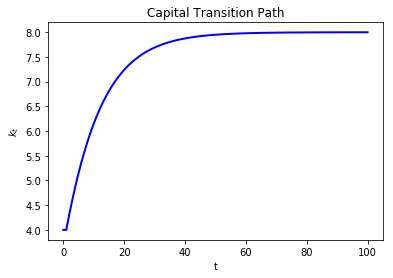

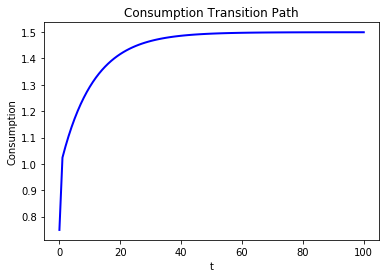

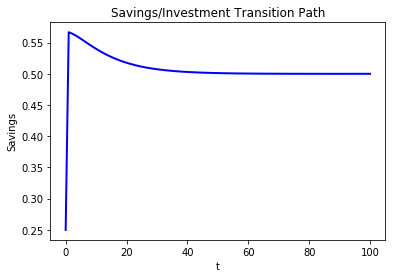

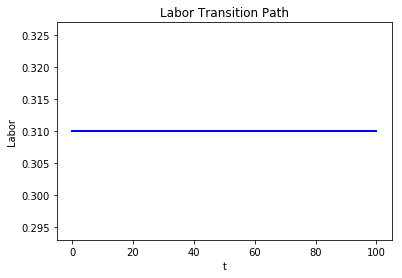

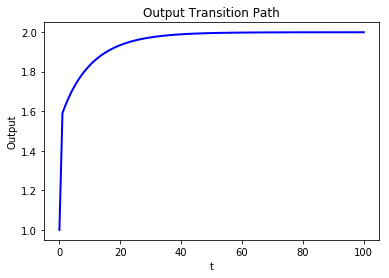

In [48]:
t = np.array(list(range(0,n+1)))
    # this is the time vector marking the periods

# Capital
fig,ax = plt.subplots()    
ax.plot(t, k_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Capital Transition Path')
ax.set_ylabel('$k_t$')
ax.set_xlabel('t')
plt.show()

# Consumption
fig,ax = plt.subplots()    
ax.plot(t, c_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Consumption Transition Path')
ax.set_ylabel('Consumption')
ax.set_xlabel('t')
plt.show()

# Savings
fig,ax = plt.subplots()    
ax.plot(t, i_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Savings/Investment Transition Path')
ax.set_ylabel('Savings')
ax.set_xlabel('t')
plt.show()

# Labor
fig,ax = plt.subplots()    
ax.plot(t, l_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Labor Transition Path')
ax.set_ylabel('Labor')
ax.set_xlabel('t')
plt.show()

# Output
fig,ax = plt.subplots()    
ax.plot(t, y_path, '-', color = 'blue', linewidth = 2)   
ax.set_title('Output Transition Path')
ax.set_ylabel('Output')
ax.set_xlabel('t')
plt.show()

It is observable from the above plots that following the doubling of the productivity parameter, the variables of interest almost completely converged to the new steady state (with $z'=2z$) after half of the transition periods considered. As already discussed in the code, the labour transition path is trivial and constant due to the way labour share is defined here.

Regarding the transition paths for output and investment/savings, we observe a drastic jump following the change of the $z$ parameter. For the output, the rapid increase amounts to almost 60%; as per investments - they reach a value more than two times the respective one for the first steady state (i.e. approximately 0.56) for the first transition period. This drastic increase is compensated for in the following periods, where the investment converges down to its second steady state value of 0.5.

Both the capital and consumption paths are smooth, showing no jumps following the change in the productivity parameter. They both converge steadily towards the new steady state values, with the capital path exhibiting a slightly slower convergence rate.

### d) The Transition with Unexpected Shocks
*Here, we are required to include an unexpected shock into the economy. This consists of the agents believing that the productivity parameter of $z$ doubles once and for all periods in the beginning; yet this parameter is cut to its original value after 10 periods in the economy - the latter behaviour being the unexpected shock.*

I will proceed as in part c), simply changing some parts of the code in order to incoroprate this unexpected shock in the productivity parameter. In particular, I will rely on the transition paths derived above up to t = 9 included; then, for the remaining periods from t = 10 up to t = 100, the observed transition will be from the state reached in time t = 9 towards the old/original steady state with $z=\dfrac{z'}{2}$.

In [49]:
# Setting the number of periods/iterations here:
n = 100 
    # i.e. we go up to T = 100 from t = 0; this is as before 
    # (and this line can be commented out - I'm leaving it here for brevity)
t_shock = 10
    # the timing of the unexpected shock
n_transition_2 = n + 1 - t_shock
    # the +1 here is because we start 'counting' from the zero element of the vector
    # this will be the number of iterations required for the new transition path from k_path(9) towards k_ss_2

# The Cobb-Douglas production function is as before; just like the values for k_ss, beta, and delta.

# NOTE TO SELF: If time allows, combine the function below with the one from above into one general function.
                # that is, function inputs should also include number of iterations T
                    # in c) it should be n; in d) that should be n_transition_2
                # also, function inputs should include the definition of k[0] and k[T-1]
                    # i.e. initial_k and final_k
                    # in c), these are k_ss and k_ss_2, respectively; in d) these are k_path(10) and k_ss

# Setting z back to its original value (currently it is doubled):
z = z/2

def path_function_shock(k):
    # Setting the first and last elements to match the two steady states:
    k[0] = k_path[9]
    k[n_transition_2-1] = k_ss # as we should be moving towards the initial steady state at the original value for z
    # Initializing the empty vector for the capital transitions:
    k_path_shock = np.zeros(n_transition_2)
    # Obtaining the middle elements:
    for i in range(0, n_transition_2-2):
        if i == 0:
            k_path_shock[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[i+2] - \
            beta*(cd_prod(k[0], z) + (1-delta)*k[0] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[0], z))/(k[0]**(1-theta))))
            # bearing in mind that z now coincides with z', i.e. that it is doubled already
        elif i == (n_transition_2-2):
            k_path_shock[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[n_transition_2-1] - \
            beta*(cd_prod(k[i], z) + (1-delta)*k[i] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[i], z))/(k[i]**(1-theta))))
        else:
            k_path_shock[i+1] = cd_prod(k[i+1], z) + (1-delta)*k[i+1] - k[i+2] - \
            beta*(cd_prod(k[i], z) + (1-delta)*k[i] - k[i+1])* \
            (1 - delta + (1-theta)*((k[i+1])**(-theta))*((cd_prod(k[i], z))/(k[i]**(1-theta))))
    return(k_path_shock)

# Solving for the capital transition path:
k_path_shock = fsolve(path_function_shock, np.linspace(8, 4, n_transition_2))
    # Here, the initial value is a vector of 100 equally-distanced points on the real segment [4,8] (backwards)
    # (where the latter interval is defined by the two steady state points)

# Obtaining the paths for the remaining variables of interest:
l_path_shock = h*np.ones(n_transition_2)
    # for the labour, knowing that the share remains the same (given)
    # (Plotting this transition is unnecessary since the path is simply the constant of h over time.)

y_path_shock = cd_prod(k_path_shock, z)
    # for the output

i_path_shock = np.zeros(n_transition_2)
for i in range(0,n_transition_2-1):
    i_path_shock[i] = k_path_shock[i+1] - k_path_shock[i]*(1-delta)
i_path_shock[n_transition_2-1] = i_path_shock[n_transition_2-2]
    # for the savings/investment, where we smooth out the last step

c_path_shock = y_path_shock - i_path_shock

# Adding the initial 10 periods from 0 to 9 to the above paths:
k_path_shock = np.append(k_path[0:10], k_path_shock)
y_path_shock = np.append(y_path[0:10], y_path_shock)
i_path_shock = np.append(i_path[0:10], i_path_shock)
c_path_shock = np.append(c_path[0:10], c_path_shock)
l_path_shock = np.append(l_path[0:10], l_path_shock)

Again, I will proceed to plot the above transition paths as before.

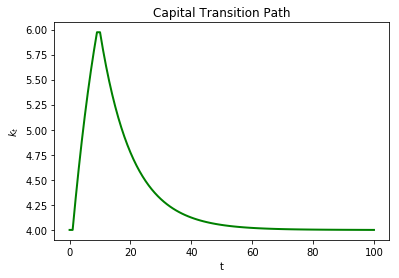

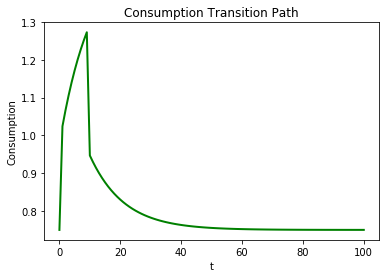

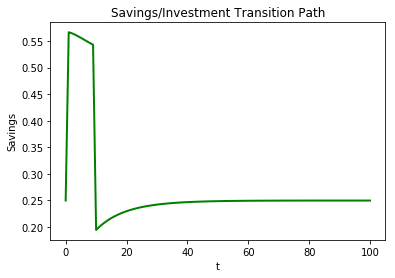

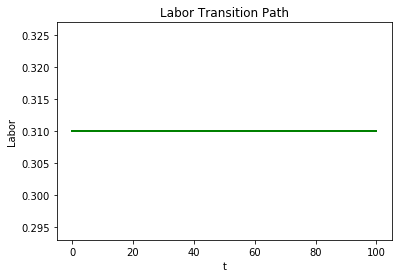

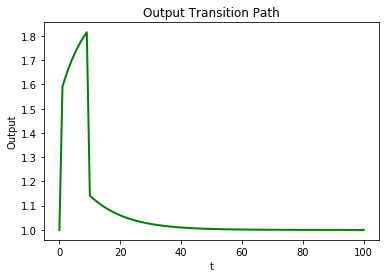

In [50]:
t = np.array(list(range(0,n+1)))
    # this is the time vector marking the periods - same as before, leaving it for brevity

# Capital
fig,ax = plt.subplots()    
ax.plot(t, k_path_shock, '-', color = 'green', linewidth = 2)   
ax.set_title('Capital Transition Path')
ax.set_ylabel('$k_t$')
ax.set_xlabel('t')
plt.show()

# Consumption
fig,ax = plt.subplots()    
ax.plot(t, c_path_shock, '-', color = 'green', linewidth = 2)   
ax.set_title('Consumption Transition Path')
ax.set_ylabel('Consumption')
ax.set_xlabel('t')
plt.show()

# Savings
fig,ax = plt.subplots()    
ax.plot(t, i_path_shock, '-', color = 'green', linewidth = 2)   
ax.set_title('Savings/Investment Transition Path')
ax.set_ylabel('Savings')
ax.set_xlabel('t')
plt.show()

# Labor
fig,ax = plt.subplots()    
ax.plot(t, l_path_shock, '-', color = 'green', linewidth = 2)   
ax.set_title('Labor Transition Path')
ax.set_ylabel('Labor')
ax.set_xlabel('t')
plt.show()

# Output
fig,ax = plt.subplots()    
ax.plot(t, y_path_shock, '-', color = 'green', linewidth = 2)   
ax.set_title('Output Transition Path')
ax.set_ylabel('Output')
ax.set_xlabel('t')
plt.show()

In this scenario with the unexpected shock in t = 10, we observe that the variables were following their paths from before until the negative change in the doubled productivity parameter happened. At the time of the shock, the transitions exhibit a kink as expected, and afterwards, the paths smoothly return to the original values in the initial steady state at $z=2$.

Once again, we observe an overkill of some sense in the path for investment - immediately after the shock, the transition shows a drastic negative change to a value that is lower than the steady state one for the original $z$. This is to some extent natural due to the previous behaviour of households and to compensate for the higher previous investment levels combined with the drastic drop in the productivity parameter.

### e) Labour Choice (bonus question)
Within this bonus question, we are asked to allow for elastic labour supply. That is, we let preferences be given explicitly by:
$$
u(c_t, 1-h_t) = \log{c_t} - \kappa\dfrac{h_t^{1+\dfrac{1}{\nu}}}{1+\dfrac{1}{\nu}} \, ,
$$
where $1-h_t$ represents leisure at time $t$; and we recompute the transitions from before.

The latter change needs to be included in the transition function by the means of the respective F.O.C. for labour supply/leisure. That is, since now labour supply is no longer constant, we will need to solve for it as well.

#### Some Relevant Analytical Derivations
Recall that we can re-write the optimization problem of the representative household as:
\begin{align*}
&\max_{c_t, k_{t+1}} \mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t, 1-h_t)\right\}\\
&\text{s.t.} \quad c_t + k_{t+1} - (1-\delta)k_t = k_t^{1-\theta}(zh_t)^{\theta}, \quad \forall t \, ,
\end{align*}
where in this case we include labour choice into the utility, as required.

This formulation allows us to construct the Lagrangean function as follows:
$$
\mathcal{L}(c_t, 1-h_t, k_{t+1}; \mu_t) = \mathbb{E}_0 \left\{\sum_{t=0}^{\infty} \beta^t u(c_t, 1-h_t)\right\} - \sum_{t=0}^{\infty}\mu_t\left(c_t + k_{t+1} - (1-\delta)k_t - k_t^{1-\theta}(zh_t)^{\theta}\right) \, .
$$

The respective First-Order Conditions read as:
\begin{align*}
[c_t]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial c_t} = 0 &\Leftrightarrow \beta^t u_c(c_t,1-h_t) - \mu_t = 0 \, ;\\
[1-h_t]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial (1-h_t)} = -\dfrac{\partial \mathcal{L}(\cdot)}{\partial h_t} = 0 &\Leftrightarrow \beta^t u_h(c_t, 1-h_t) + \mu_t \theta z^{\theta} \left(\dfrac{k_t}{h_t}\right)^{1-\theta} = 0 \, ;\\
[k_{t+1}]: \quad &\dfrac{\partial \mathcal{L}(\cdot)}{\partial k_{t+1}} = 0 &\Leftrightarrow -\mu_t + \mu_{t+1}\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right) = 0 \, .
\end{align*}

As before, one can proceed as usual to combine the respective F.O.C.s for $c_t$ and $c_{t+1}$ together with the expression above for $k_{t+1}$ to obtain the inter-temporal Euler equation for consumption. That is, following a substitution with $u_c(c, 1-h) = \dfrac{1}{c}$ (by the log-utility on consumption given), the Euler equation here reads as:
$$
c_{t+1} = \beta\left((1-\delta) - (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta}\right)c_t \, .
$$

Once again, once the steady-state is imposed on $c$ and $k$, we have that $c_{t+1}=c_t\equiv c_{ss}$ and this translates to 
$$
(1-\delta) + (1-\theta)(zh_t)^{\theta}k_{t+1}^{-\theta} = \beta^{-1} \quad \text{at the st.s.}
$$

That is, for $k_{ss}$ it will hold that 
$$
k_{t+1}=k_t\equiv k_{ss} = \left(\dfrac{1-\theta}{1-\delta-\dfrac{1}{\beta}}\right)^{\dfrac{1}{\theta}}\cdot zh_{ss} \, .
$$

Here, however, we also need to include the first-order condition on $1-h_t$ derived above. The latter is equivalent to:
$$
 -\beta^t\kappa h_t^{\frac{1}{\nu}} + \mu_t\theta z^{\theta}\left(\dfrac{k_t}{h_t}\right)^{1-\theta} = 0 \, ,
$$
once we substitute with $u_h = -\kappa h^{\frac{1}{\nu}}$. Here, for the signs, it is important to notice that $-\kappa$ measures the relative value of leisure as compared with the value of 1 unit of consumption for the households.

Combining the last two equations we have here, where we impose the steady state on capital, I arrive at:
\begin{align*}
\beta_{ss}\kappa h_{t}^{\frac{1}{\nu}} &= \mu_{t}\theta z^{\theta}(Az)^{1-\theta}\\
\Leftrightarrow \beta_{ss}\kappa h_{t}^{\frac{1}{\nu}} &= \mu_{t}\theta zA^{1-\theta}\\
\Leftrightarrow h_{t} &= \left(\dfrac{\mu_{t}\theta zA^{1-\theta}}{\beta_{ss}\kappa}\right)^{\nu}\, ,
\end{align*}
where I substitute with $A = \left(\dfrac{1-\theta}{1-\delta-\dfrac{1}{\beta}}\right)^{\dfrac{1}{\theta}}$.

We can proceed one step further here by substituting with $\mu_t = \dfrac{\beta_{ss}^t}{c_{ss}}$, which will give us the final expression for labor supply at the steady state:
$$
h_{ss} = \left(\dfrac{\theta zA^{1-\theta}}{\kappa c_{ss}}\right)^{\nu} \, .
$$

#### Computational Derivations
Below, I will provide the computation of the steady state and for the transition path (analogously to c).

In [51]:
# NOTE TO SELF: Vary the first couple of parameters' values if time allows, to see the effects of nu and kappa!
nu = 0.3; kappa = 0.2; 
theta = 0.67; k_to_y = 4; i_to_y = 0.25;
z = 1.629 # as suggested

def st_state_function_2(x):
  # The Six Constraints:
  #   (which will be equated to zero when obtaining the roots/solution)
  # - The Capital-Output Ratio:
  k_to_y_constr = k_to_y - (x[1]/x[2])
  # - The Investment-Output Ratio:
  i_to_y_constr = i_to_y - ((x[3]*x[1])/x[2])
  # - The Euler Equation:
  ee_constr = (1 - x[3] + (1-theta)*((z*x[5])**theta)*(x[1])**(-theta))*x[4]-1
  # - The Budget/Resource Constraint:
  b_constr = x[2] - x[0] - x[1]*x[3]
  # - Cobb-Douglas Production:
  cd_prod_constr = x[2] - (x[1]**(1-theta))*((z*x[5])**(theta))
  # - Labour Suplply FOC:
  A = ((1-theta)/(1-delta-(1/x[4])))**(1/theta)
  labor_constr = x[5] - ((((theta*z*(A**(1-theta)))/(kappa*x[0])))**nu)
  # For the six variables of: c_ss, k_ss, y_ss, delta, beta, and labour supply
  # - these are six and not seven since we can isolate i_ss as i_ss = k_ss*delta 
  #   in the budget constraint
  # - also considering z to be a parameter rather than a variable
  #   [following the arguments in the analytical part - it cancels out]
  # - having put these variables into a vector x to match the syntax of the fsolve funct:
  # x = (c_ss, k_ss, y_ss, delta, beta, labor)
  #     x[0]   x[1]  x[2]  x[3]   x[4]   x[5]
  return [k_to_y_constr, i_to_y_constr, ee_constr, b_constr, cd_prod_constr, labor_constr]

# STEP 2: 
# Setting the initial guess:
x_0 = [0.7, 3.9, 1, 0.06, 0.95, 0.2]
  # using the normalization y = 1 at the initial guess

# STEP 3: 
# Solving the function, i.e. finding the steady state numerically:
x_ss_2 = fsolve(st_state_function_2, x_0)
print(x_ss_2)

# These are the steady state values for consumption, capital, output, delta and beta, respectively:

[0.7  3.9  1.   0.06 0.95 0.2 ]


C:\Users\Ivana\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Ivana\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Need to fix this - I think the issue comes from the $\beta\cdot$s.

## Question 2. A COVID-19 Lockdown Model
Following the ideas/paper from class, we are here facing the following optimization problem, where the Social Planner maximizes:
$$Y(H_f,H_{nf}) - \kappa_f H_f - \kappa_{nf}H_{nf} - \omega D$$
over $H_f$ and $H_{nf}$, subject to the constraints of:
\begin{align*}
Y(H_f,H_{nf}) &= \left(A_fH_f^{\frac{\rho-1}{\rho}} + c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}}  \right)^{\frac{\rho}{\rho-1}}\\
H_f + H_{nf} &\leq N\\
D &= \beta(HC)(1-\gamma)\dfrac{i_0 H_f^2}{N} \, .
\end{align*}

The associated Lagrangian, for the case where the Lagrangian multiplier associated with the inequality constraint is equal to $0$, i.e. when it is non-binding, gives the First-Order Conditions of:
\begin{align*}
    \frac{\partial \mathcal{L}}{\partial H_f} &= 0 &\Leftrightarrow (A_f H_f^{\frac{\rho-1}{\rho}}+c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}})^{\frac{1}{\rho-1}}A_fH_f^{\frac{-1}{\rho}}=\kappa_f+ 2\omega (1-\gamma) \beta (HC)\frac{i_0 H_f}{N}\, ; \\
    \frac{\partial \mathcal{L}}{H_{nf}} &= 0 &\Leftrightarrow (A_f H_f^{\frac{\rho-1}{\rho}}+c(TW)A_f H_{nf}^{\frac{\rho-1}{\rho}})^{\frac{1}{\rho-1}} c(TW)A_fH_{nf}^{\frac{-1}{\rho}}= \kappa_{nf} \, ,
\end{align*}
as seen in our slides.

Furthermore, we 'know' some of the parameter values - i.e. I will set these to the ones observed in class, using the small chunk of code below.

In [60]:
# Setting the fixed parameter values to the levels observed in class:
# - Techn/prod. param:
A_f = 1; A_nf = 1
# associated with H_f := the aggregate hours at the workplace;
#            and H_nf := the aggregate hours from teleworking.
# - Relative values of working for an hour less at the workplace / from home for the household:
κappa_f = 0.2; κappa_nf=0.2
# as compared to one unit of consumption. That is, kappa-s capture preferences of workers.
# - The gamma for the (1-gamma) deadly infections of employed individuals: 
gamma = 0.9
# - The initial share of infections as work:
i_0 = 0.2
# - The ex-ante idential individuals' continuum populating the economy:
N = 1

Now, I will proceed to define the objective function as stated above, and will be minimizing it with respect to different values for $\omega$ and $\rho$. *(As seen in class, the former of the two variables measure how much the planner cares about the number of deaths $D$.)*

In [100]:
# Setting some extra parameters for the plotting of heatmaps:
# - The grid size on each dimension for the heatmaps:
n = 10
# - The grid used for plotting c(TW) and beta:
grid = np.linspace(0,1,n)

# Creating the function to calculate the optima:
# second and third arguments are for rho and omega
def solve_SP_function(n, r, o):
    power_r = (r-1)/r
    # Defining the inequality constraint:
    constr = ({'type': 'ineq', 'fun': lambda h: N - h[0] - h[1]})
    # Initializing matrices for storing the results on H_f and H_nf:
    H_f = np.zeros(shape = (n,n))
    H_nf = np.zeros(shape = (n,n))
    # Initializing a matrix for output:
    Y = np.zeros(shape = (n,n))
    # Initializing a matrix for infections:
    I = np.zeros(shape = (n,n))
    # Initializing a matrix for welfare:
    W = np.zeros(shape = (n,n))
    for i in range(n):
        for j in range(n):
            h_0 = [0.5, 0.5]     # initial guess for running the minimize function
            # Defining the objective function 
            #(the negative version of it, as I will be relying on the minimize function here):
            SP_function = lambda h: -(A_f*(h[0]**power_r) + grid[j]*A_nf*(h[1]**(power_r)))**(1/power_r) - κappa_f*h[0] - κappa_nf*h[1] - o*((1-gamma)*grid[i]*(i_0*h[0]**2/N))
            solution = minimize(SP_function, h_0,
                                constraints = constr, bounds = [(0,1), (0,1)])
            H_f[i][j] = solution.x[0]
            H_nf[i][j] = solution.x[1]
                                 # in this last step, I fill the initialized empty matrices with the solutions
            # THE ABOVE STEP GIVES THE VALUES FOR THE MATRICES OF H_f & H_nf
            Y[i][j] = (A_f*(H_f[i][j]**power_r) + grid[j]*A_nf*(H_nf[i][j]**power_r))**(1/power_r)
            # THIS IS THE OUTPUT
            I[i][j] = H_f[i][j]**2*n*grid[i]
            # THESE ARE THE INFECTIONS
            W[i][j] = (A_f*(H_f[i][j]**power_r) + \
                       grid[j]*A_nf*(H_nf[i][j]**power_r))**(1/power_r) - \
            κappa_f*H_f[i][j] - κappa_nf*H_nf[i][j] - o*((1-gamma)*grid[i]*(i_0*H_f[i][j]**2/N))
            # THIS IS THE WELFARE
    H = H_f + H_nf
    # THIS IS TOT AGG HS
    H_f_to_H = H_f/H
    # THE RATIO
    D = (1-gamma)*I
    # DEATHS
    return([H_f, H_nf, H_f_to_H, I, D, W, Y])

Now, I proceed to write a function that creates all the 7 plots for each specification on $\rho$ and $\omega$ tested. *(Namely, the heatmaps of $H_f$, $H_{nf}$, the ratio of $H_f$ to $H$, the total infections $I$, the total deaths $D$, the total welfare $W$, as well as the agg. output $Y$.)*

In [64]:
# I had issues defining this function for heatmaps, so I will simply plot manually, sorry for this.
# NOTE TO SELF: fix this issue, if time allows.

#### Specification 1 - Low $\rho$, low $\omega$
Here, I will look at the case of $\rho = 1.1$, $\omega = 20$ - i.e. a scenario with relatively low parameter values.

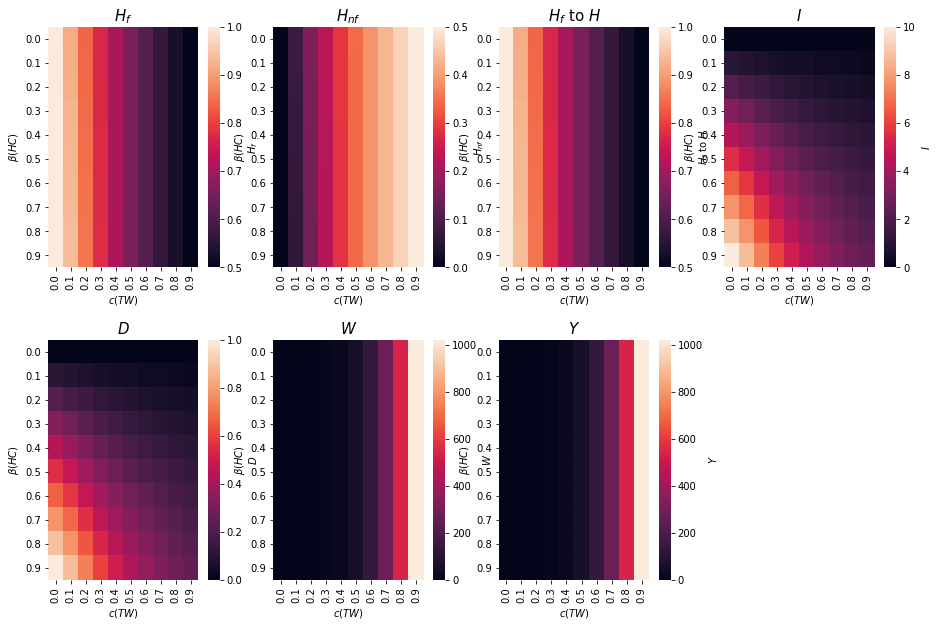

In [102]:
# Generate the values using the above-defined solve_SP_function:
res = solve_SP_function(n = 10, r = 1.1, o = 20)

# Setting the x & y ticks
ticks = np.round(np.linspace(0, 0.9, 10),1)

# Plotting the heatmaps:
plt.figure()
# H_f
plt.subplot(241)
sns.heatmap(res[0], cbar_kws = {"label": "$H_f$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_f$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_nf
plt.subplot(242)
sns.heatmap(res[1], cbar_kws = {"label": "$H_{nf}$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{nf}$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_f_to_H
plt.subplot(243)
sns.heatmap(res[2], cbar_kws = {"label": "$H_{f}$ to $H$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{f}$ to $H$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# I
plt.subplot(244)
sns.heatmap(res[3], cbar_kws = {"label": "$I$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$I$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# D
plt.subplot(245)
sns.heatmap(res[4], cbar_kws = {"label": "$D$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$D$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# W
plt.subplot(246)
sns.heatmap(res[5], cbar_kws = {"label": "$W$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$W$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# Y
plt.subplot(247)
sns.heatmap(res[6], cbar_kws = {"label": "$Y$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$Y$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")

plt.subplots_adjust(top = 2, bottom = 0.08, left = 0, right = 2, hspace = 0.3, wspace = 0.2)

plt.show()

Recall that the $c(TW)$ value captures the productivity loss associated with teleworking; and that $\beta(HC)$ stands for the conditional infection rate which depends on the extent of human contact (HC).

The above findings are completely in line with what we discussed in class for relatively low values of $\rho$ and of $\omega$, where the social planner does not care about aggregate deaths much.

#### Specification 2 - Low $\rho$, high $\omega$
Here, I will look at the case of $\rho = 1.1$, $\omega = 100$. That is, I will compare the above case to a scenraio where the value of $\rho$ stays the same, but the social planner cares much more about the aggregate deaths, as captured by the $\omega$ parameter.

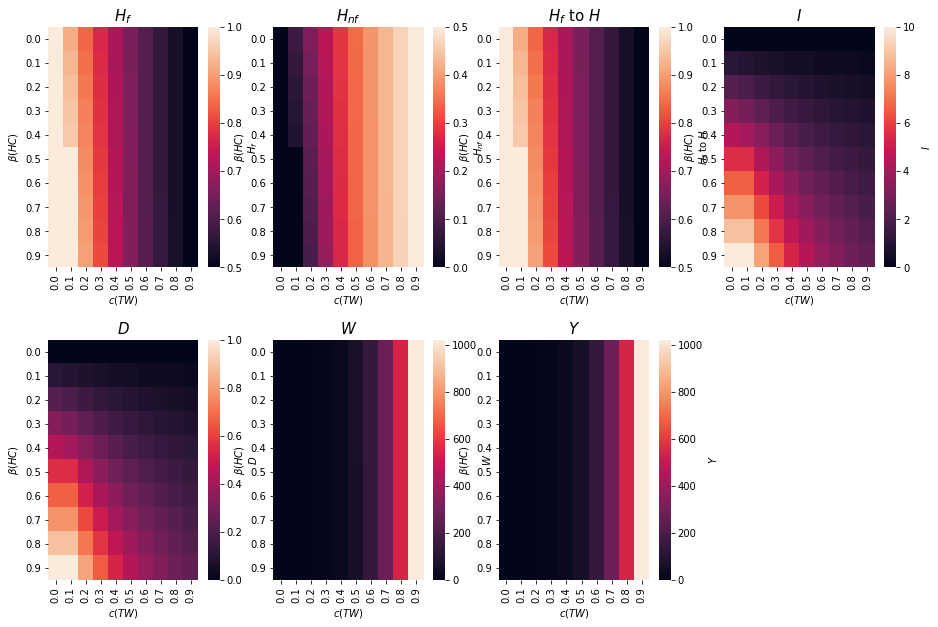

In [103]:
# Generate the values using the above-defined solve_SP_function:
res = solve_SP_function(n = 10, r = 1.1, o = 100)

# Setting the x & y ticks
ticks = np.round(np.linspace(0, 0.9, 10),1)

# Plotting the heatmaps:
plt.figure()
# H_f
plt.subplot(241)
sns.heatmap(res[0], cbar_kws = {"label": "$H_f$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_f$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_nf
plt.subplot(242)
sns.heatmap(res[1], cbar_kws = {"label": "$H_{nf}$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{nf}$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_f_to_H
plt.subplot(243)
sns.heatmap(res[2], cbar_kws = {"label": "$H_{f}$ to $H$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{f}$ to $H$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# I
plt.subplot(244)
sns.heatmap(res[3], cbar_kws = {"label": "$I$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$I$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# D
plt.subplot(245)
sns.heatmap(res[4], cbar_kws = {"label": "$D$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$D$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# W
plt.subplot(246)
sns.heatmap(res[5], cbar_kws = {"label": "$W$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$W$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# Y
plt.subplot(247)
sns.heatmap(res[6], cbar_kws = {"label": "$Y$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$Y$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")

plt.subplots_adjust(top = 2, bottom = 0.08, left = 0, right = 2, hspace = 0.3, wspace = 0.2)

plt.show()

Here, for the same value of $\rho$ as before, but for much higher $\omega$, we observe, a higher number of deaths for lower $c(TW)$ and higher $\beta(HC)$ than before. Herer, the Social Planner values deaths more, but the individual households have strong preferences against teleworking. That is, as discussed in class, hours worked at work increase as a proportion of aggregate hours worked in total for lower values of $c(TW)$ and higher conditional infection rate - which is a natural consequence of the introduced increase in $\omega$.

Output and welfare remain the same as before.

#### Specification 3 - High $\rho$, low $\omega$
Here, I will look at the case of $\rho = 10$, $\omega = 20$. That is, I will compare the above case to a scenraio where the value of $\rho$ is much higher, but the social planner does not care much more about the aggregate deaths, as captured by the $\omega$ parameter.

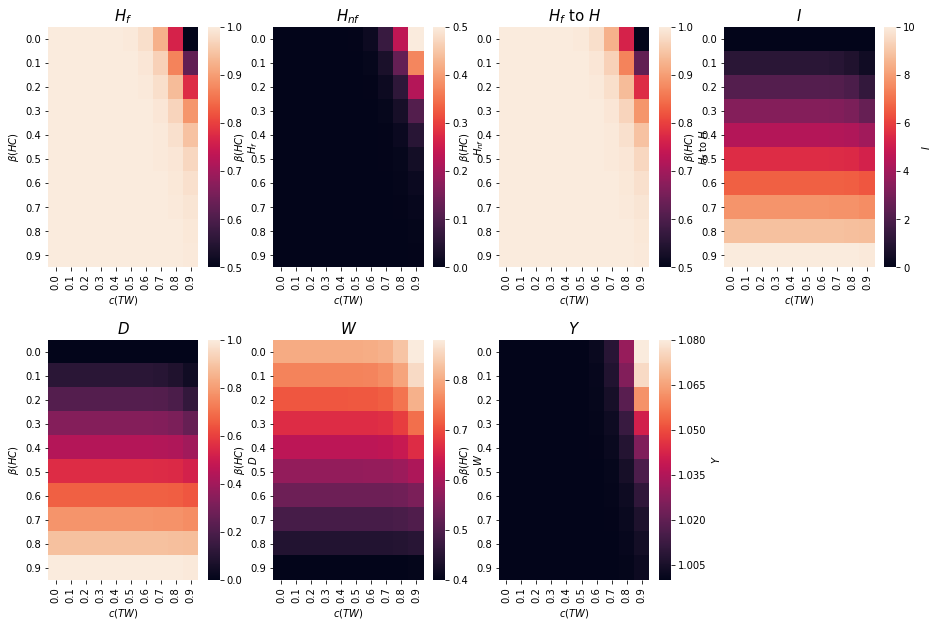

In [104]:
# Generate the values using the above-defined solve_SP_function:
res = solve_SP_function(n = 10, r = 10, o = 20)

# Setting the x & y ticks
ticks = np.round(np.linspace(0, 0.9, 10),1)

# Plotting the heatmaps:
plt.figure()
# H_f
plt.subplot(241)
sns.heatmap(res[0], cbar_kws = {"label": "$H_f$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_f$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_nf
plt.subplot(242)
sns.heatmap(res[1], cbar_kws = {"label": "$H_{nf}$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{nf}$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_f_to_H
plt.subplot(243)
sns.heatmap(res[2], cbar_kws = {"label": "$H_{f}$ to $H$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{f}$ to $H$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# I
plt.subplot(244)
sns.heatmap(res[3], cbar_kws = {"label": "$I$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$I$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# D
plt.subplot(245)
sns.heatmap(res[4], cbar_kws = {"label": "$D$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$D$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# W
plt.subplot(246)
sns.heatmap(res[5], cbar_kws = {"label": "$W$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$W$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# Y
plt.subplot(247)
sns.heatmap(res[6], cbar_kws = {"label": "$Y$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$Y$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")

plt.subplots_adjust(top = 2, bottom = 0.08, left = 0, right = 2, hspace = 0.3, wspace = 0.2)

plt.show()

What is observed in the plots above is again quite in line with what we saw in class for such a specification.

As one would expect, aggregate hours worked from home (teleworking) are much lower for almost all values on the conditional infection rate and on the cost of teleworking. The latter is due to the drastic positive change in $\rho$ which captures the preferences of individuals. Consequently, deaths decrease for lower values on $\beta$, but increase drastically for higher values of $\beta(HC)$ regardless of the cost of teleworking's level. Naturally, infections are concentrated for professions where the conditional infection rate is higher, since the Social Planner does not value the aggregate number of agents alive much.

This change of parametrization leads to a tangible decrease of output for almost all combinations of $\beta(HC)$ and $c(TW)$, apart from the top right corner, which stands for the lowest conditional infection rate and the highest possible cost of teleworking. Once again, the latter follows from the low value of $\omega$ for the social planner, who does not value the lives of agents too much, and everyone will be forced to work in person much more.

Deaths decrease for professions with lower conditional infection rate depending on the human contact, as compared to the previous scenario. Welfare for agents with lower $\beta(HC)$ increases as a result, following the positive change in $\rho$.

#### Specification 4: High $\rho$, high $\omega$

Here, I will look at the case of $\rho = 10$, $\omega = 100$. That is, I will compare the above case to a scenraio where the value of $\rho$ is much higher, and where the social planner cares a lot about the aggregate deaths, as captured by the $\omega$ parameter.

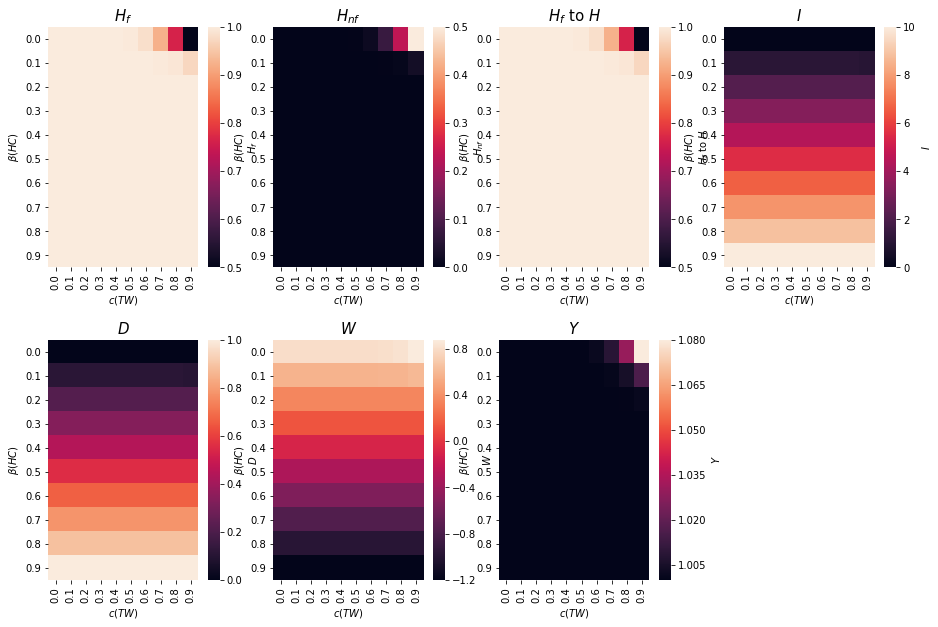

In [105]:
# Generate the values using the above-defined solve_SP_function:
res = solve_SP_function(n = 10, r = 10, o = 100)

# Setting the x & y ticks
ticks = np.round(np.linspace(0, 0.9, 10),1)

# Plotting the heatmaps:
plt.figure()
# H_f
plt.subplot(241)
sns.heatmap(res[0], cbar_kws = {"label": "$H_f$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_f$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_nf
plt.subplot(242)
sns.heatmap(res[1], cbar_kws = {"label": "$H_{nf}$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{nf}$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# H_f_to_H
plt.subplot(243)
sns.heatmap(res[2], cbar_kws = {"label": "$H_{f}$ to $H$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$H_{f}$ to $H$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# I
plt.subplot(244)
sns.heatmap(res[3], cbar_kws = {"label": "$I$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$I$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# D
plt.subplot(245)
sns.heatmap(res[4], cbar_kws = {"label": "$D$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$D$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# W
plt.subplot(246)
sns.heatmap(res[5], cbar_kws = {"label": "$W$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$W$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")
# Y
plt.subplot(247)
sns.heatmap(res[6], cbar_kws = {"label": "$Y$"}, xticklabels = ticks, yticklabels = ticks)
plt.title("$Y$", fontsize = 15)
plt.xlabel("$c(TW)$")
plt.ylabel("$\\beta(HC)$")

plt.subplots_adjust(top = 2, bottom = 0.08, left = 0, right = 2, hspace = 0.3, wspace = 0.2)

plt.show()

As expected, this last specification leads to the lowest output across all scenarios since the aggregate value of death is much higher than before, and the parameter of $\rho$ is simultaneously higher than before. Total welfare decreases compared to the previous scenrario; deaths remain more or less the same.